# A convolução e os Sistemas Lineares Invariantes no tempo (e espaço!)

## Sistemas LIT



* No domínio de tempo contínuo: 
  Suponhamos um sinal de entrada $x(t)$ e um **kernel** (ou **máscara** ou **filtro**) $g(t)$.
  A convolução entre $x(t)$ e $g(t)$ gera um sinal de saída $y(t)$, tal que
  $$ x(t) * g(t) = y(t) = \int_{-\infty}^{\infty} x(t-\tau) g(\tau) d\tau$$
* No domínio do tempo discreto:
  Suponhamos um sinal de entrada $x[t]$ e um **kernel** (ou **máscara** ou **filtro**) $g[t]$.
  $$x[t] * g[t] = y[t] =  \sum_{k = -\infty}^{\infty} x[t - k] g[k] $$




Primeiro, vamos entender que na prática um somatório definido no intervalo $[-\infty, \infty]$ não faz muito sentido. Portanto, nós iremos prefixar um certo tamanho para esta operação. Este tamanho será definido pelo tamanho do nosso kernel.

<img src ="figs/conv_1.png"  width = "700">

## Padding

<img src ="figs/conv_2.png"  width = "400">

<img src ="figs/conv_3.png"  width = "400">

In [36]:
import numpy as np


def conv1D(x, w, p=0 , s=1): 
  '''
  x : sinal de entrada
  w : kernel
  p : tamanho do padding 
  s : tamanho do passo (stride)
  '''
  assert len(w) <= len(x), "se asegure que o tamanho de w é menor que o de x"
  assert p >= 0, "se assegure que o valor do pedding não é negativo"

  w_r = np.array(w[::-1]) # espelhamento de w
  x_padded = np.array(x)

  if p > 0 :
    zeros = np.zeros(shape = p)
    x_padded = np.concatenate([zeros, x_padded, zeros]) #adiciona zeros no início e fim do sinal de entrada

  out = []
  #iterate through the original array s cells per step
  for i in range(0, int((len(x_padded) - len(w_r))) + 1 , s):
    out.append(np.sum(x_padded[i:i + w_r.shape[0]] * w_r)) #formula we have seen before
  
  return np.array(out)

In [38]:
x = [3,6,8,2,1,4,7,9]
w = [4 ,0, 6, 3, 2]

conv1D(x,w,2,1)

array([50., 53., 76., 64., 56., 67., 56., 83.])

No numpy:

In [5]:
np.convolve(x , w, mode = 'same')

array([50, 53, 76, 64, 56, 67, 56, 83])

In [39]:
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

# Load the audio file
filename = librosa.ex('trumpet')
print(filename)

/Users/fabianequeiroz/Library/Caches/librosa/sorohanro_-_solo-trumpet-06.ogg


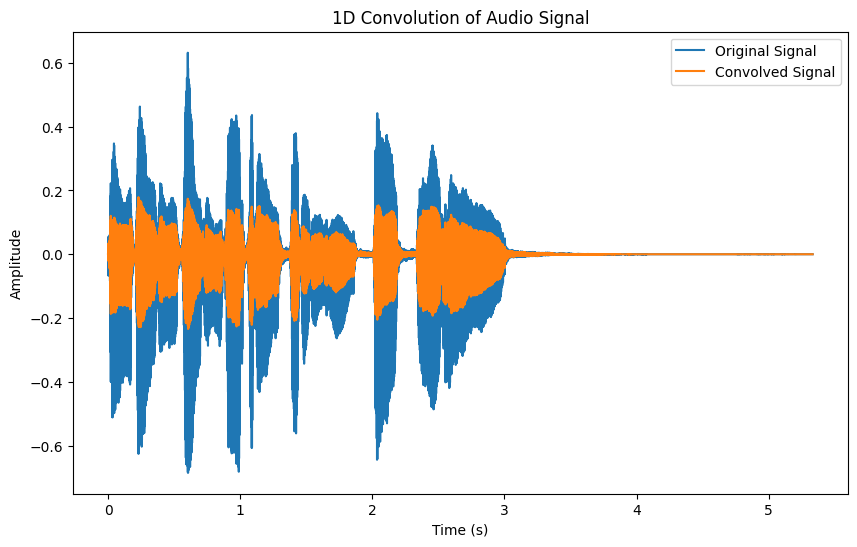

In [44]:
sinal, taxa_amostragem = librosa.load(filename)

# Define the convolution kernel (e.g., low-pass filter)
kernel = np.array([1, 1, 1,1,1,1,1,1,1,1,1]) / 11  # Simple moving average filter

# Perform the 1D convolution
convolved_signal = np.convolve(sinal, kernel, mode='same')

# Plot the original and convolved signals
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sinal)) / taxa_amostragem, sinal, label='Original Signal')
plt.plot(np.arange(len(convolved_signal)) / taxa_amostragem, convolved_signal, label='Convolved Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('1D Convolution of Audio Signal')
plt.legend()
plt.show()


In [45]:
ipd.Audio(sinal, rate=taxa_amostragem)


In [46]:

ipd.Audio(convolved_signal, rate=taxa_amostragem)

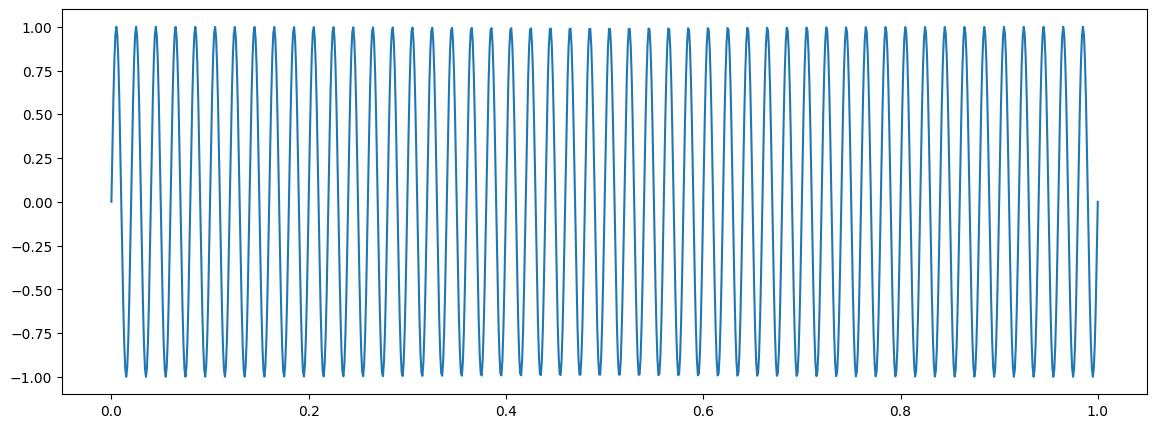

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate electric signal
num_samples = 1000
time = np.linspace(0, 1, num_samples)
#electric_signal = np.sin(2 * np.pi * 50 * time) + 0.5 * np.random.randn(num_samples)
electric_signal = np.sin(2 * np.pi * 50 * time) 

plt.plot(time, electric_signal, label='Original Signal')


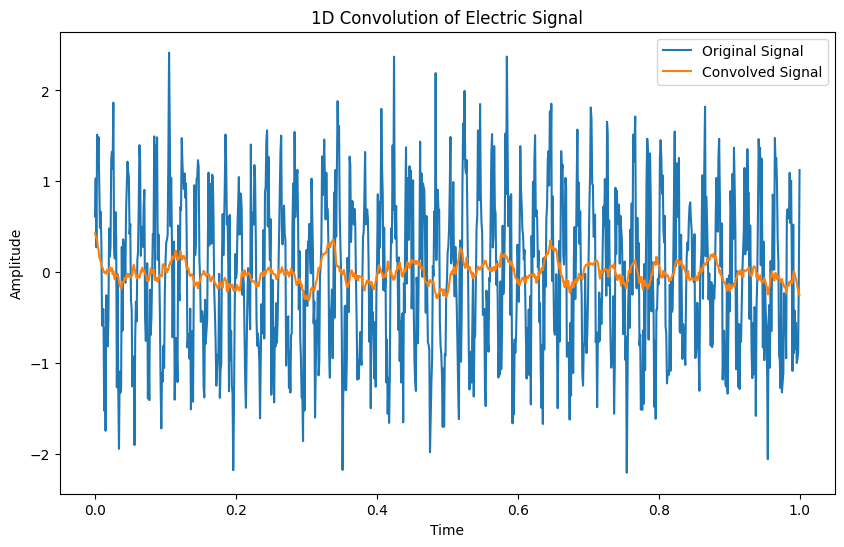

In [53]:

# Define the convolution kernel
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

# Perform the 1D convolution
convolved_signal = np.convolve(electric_signal, kernel, mode='same')

# Plot the original and convolved signals
plt.figure(figsize=(10, 6))
plt.plot(time, electric_signal, label='Original Signal')
plt.plot(time, convolved_signal, label='Convolved Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('1D Convolution of Electric Signal')
plt.legend()
plt.show()

## Sistemas Lineares Invariantes no espaço

<img src ="figs/pi_1.png"  width = "700">

<img src ="figs/pi_2.png"  width = "700">


<img src ="figs/pi_3.png"  width = "700">


<img src ="figs/pi_4.png"  width = "700">


In [56]:
import skimage.io

#Loading the image
img = skimage.io.imread(fname='figs/1.png')
type(img)


numpy.ndarray

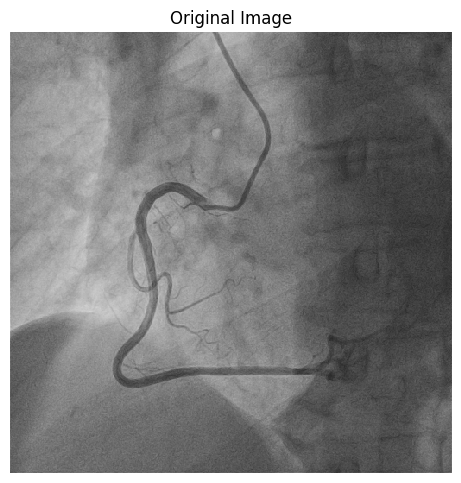

In [57]:
#Displaying the image
skimage.io.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [58]:
print(img.size)
print(img.shape)

print(img[1][100])
print(img.max(), img.min())

262144
(512, 512)
127
210 42


<img src ="figs/pi_5.png"  width = "700">


<img src ="figs/pi_6.png"  width = "700">


<img src ="figs/pi_8.png"  width = "700">


<img src ="figs/pi_9.png"  width = "700">


<img src ="figs/pi_10.png"  width = "700">


<img src ="figs/pi_11.png"  width = "700">


<img src ="figs/pi_12.png"  width = "700">


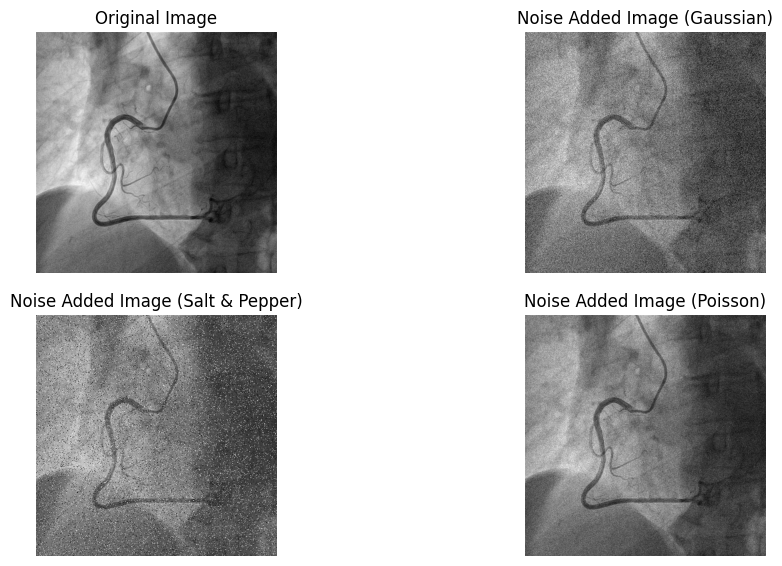

In [59]:
#Adding noise to an image:
from skimage.util import random_noise 
#Add Gaussian noise:
g_noised_image = random_noise(img, mode='gaussian')
#Add salt&pepper noise:
sp_noised_image = random_noise(img, mode='s&p', amount=0.09)
#Add Poisson noise:
poisson_noised_image =random_noise(img, mode='poisson')
#Plot all noised images with the original image:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(12,6), sharex=True, sharey=True, squeeze=True)
ax = ax.ravel()
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image, cmap='gray')
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(sp_noised_image, cmap='gray')
ax[2].set_title('Noise Added Image (Salt & Pepper)')
ax[3].imshow(poisson_noised_image, cmap='gray')
ax[3].set_title('Noise Added Image (Poisson)')
fig.tight_layout()
for a in ax:
    a.axis('off')

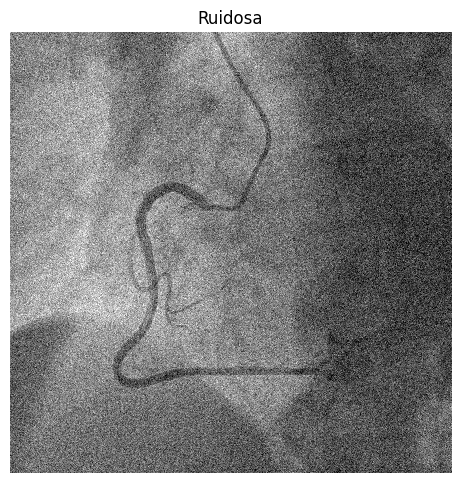

In [69]:
import skimage.filters


gauss_blurred = skimage.filters.gaussian(g_noised_image, sigma=(3,3))

skimage.io.imshow(g_noised_image)
plt.title('Ruidosa')
plt.axis('off')
plt.show()


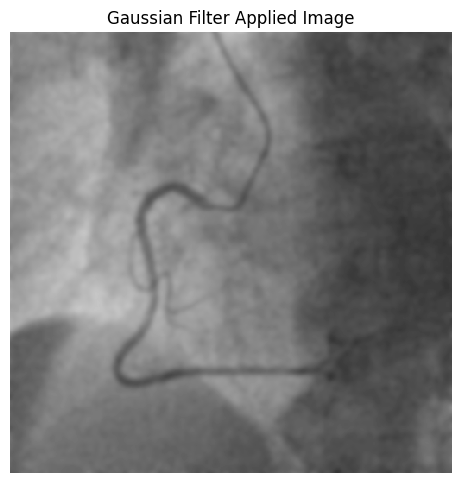

In [70]:

skimage.io.imshow(gauss_blurred)
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

plt.show()

<img src ="figs/pi_13.png"  width = "700">


<img src ="figs/pi_14.png"  width = "700">


<img src ="figs/pi_15.png"  width = "700">


/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


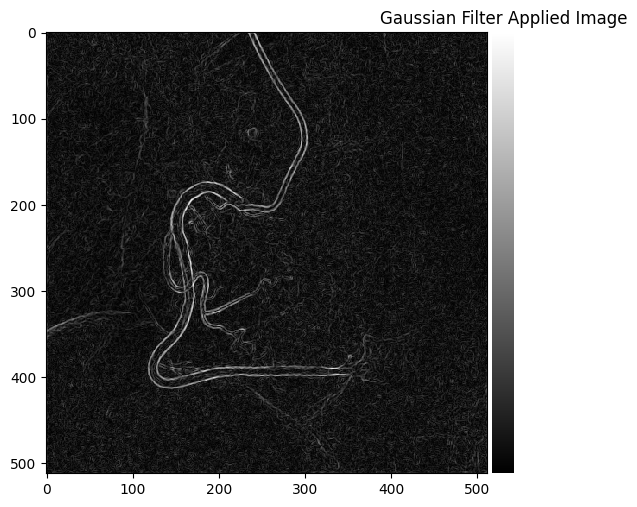

In [72]:
sobel = skimage.filters.sobel(img)
skimage.io.imshow(sobel, cmap= 'gray')
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

plt.show()

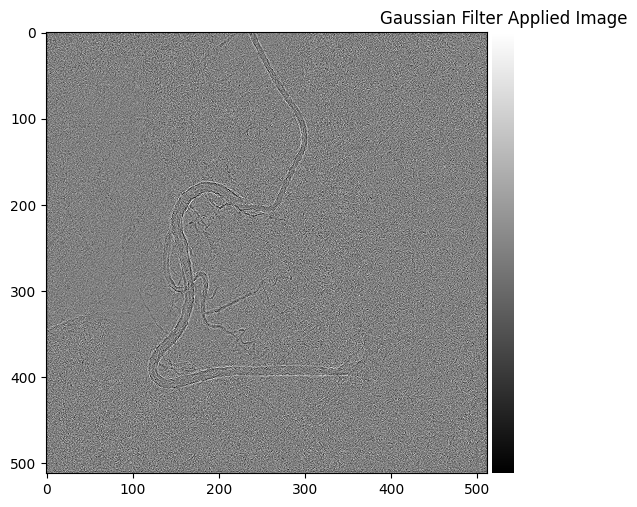

In [73]:
lap = skimage.filters.laplace(img)
skimage.io.imshow(lap, cmap='gray')
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

plt.show()

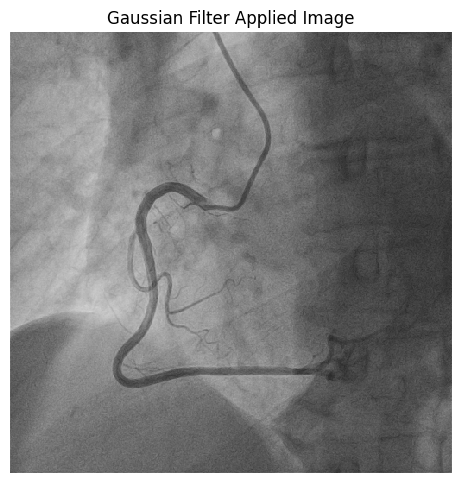

In [75]:

skimage.io.imshow(img, cmap= 'gray')
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

plt.show()

/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


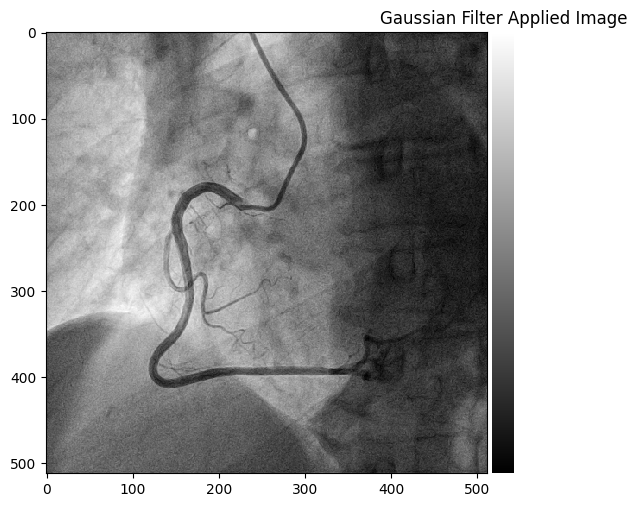

In [74]:
result = lap+img

skimage.io.imshow(result, cmap='gray')
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

plt.show()
